In [1]:
import numpy as np

## 基本概念

### 图解

![image.png](https://cdn2.flowus.cn/oss/277bb397-8009-4803-b6dd-7cb512fc42fa/image.png?time=1769011200&token=42173ad089c68a7734c2bfc20b0e88485b49a0a7072f5bdd8cc75933a6db429c&role=sharePaid&rate=512)

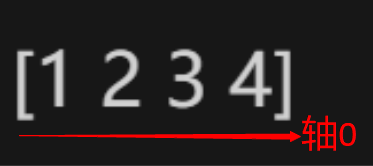

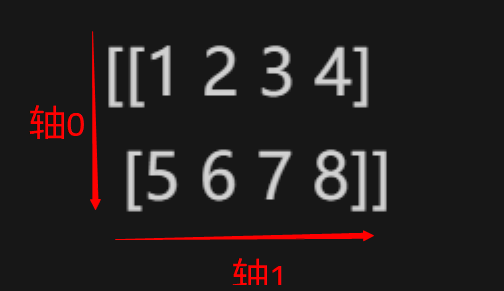

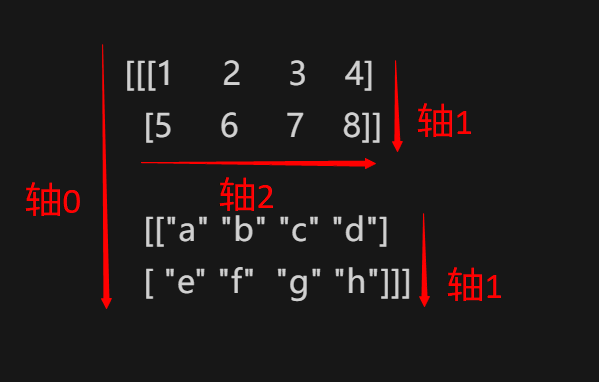

### 数组（ndarray）

1. **一维数组【列表】**

    类似列表，但数组切片针对原始数据

2. **二维数组（矩阵）【关于一维数组的列表】**

    以数组为元素的数组，包括行和列，类似表格

3. **三维数组（矩阵列表）【关于二维数组的列表】**

    最常见的多维数组。指维数为3的数组结构，可用来描述三维空间中的位置或状态

4. **结构化数组**

    用于处理异质数据的重要工具，通过定义复杂的数据类型，可以创建具有不同字段的数组，类似于表格或数据库中的行。结构化数组提供了访问、修改、排序和条件筛选数据的灵活性，同时也方便与 Pandas DataFrame 进行交互

### 轴（axis）

指定数组的某个轴可以沿该轴做相关操作（具体如上图）

对于一维数组，由于无法从上至下操作，因此其只有水平轴，即其轴0为水平轴（具体如上图）

### 广播机制（broadcast）

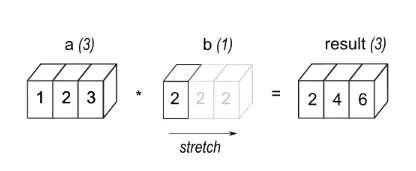

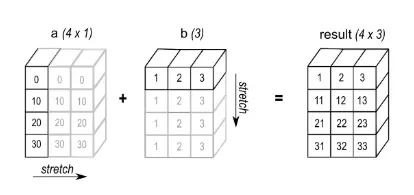

## 基础创建

### array函数

`array（object, dtype=None, copy=True, ndmin=0, order="K", subok=False, like=None）`

1. **object**: 任何具有数组接口方法的对象（数组、列表、元组等，主要是列表和数组）

2. **dtype**: 数据类型。可以通过设置不同字段和数据类型以创建结构化数组

3. **copy**: 是否复制原数组。默认为True

4. **ndmin**: 指定最小维度

5. subok: 是否从子类创建数组。默认为False，即强制创建基类数组

6. order: 元素在内存中的存储顺序

    |**order**|**object**|**copy=False**|**copy=True**|
    |-|-|-|-|
    |**"K"（默认）**|均可|元素在内存中出现的顺序|F & C 顺序保留，其它顺序最相似|
    |**"A"**|数组|原顺序|如果输入为 F 且不是 C，则为 F 顺序，否则为 C 顺序|
    |**"C"**|均可|C 顺序（按行）|C 顺序（按行）|
    |**"F"**|均可|F 排序（按列）|F 排序（按列）|

7. like: 默认为None

#### 简单创建

In [2]:
# 一维数组
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [3]:
# 二维数组
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [4]:
# 三维数组
np.array([[[1, 2, 3, 4], [5, 6, 7, 8]], [["a", "b", "c", "d"], ["e", "f", "g", "h"]]])

array([[['1', '2', '3', '4'],
        ['5', '6', '7', '8']],

       [['a', 'b', 'c', 'd'],
        ['e', 'f', 'g', 'h']]], dtype='<U21')

#### 设置dtype

In [6]:
n3 = np.array([1, 2, 3, 4], dtype=np.float64)
print(n3, n3.dtype, type(n3[0]))

[1. 2. 3. 4.] float64 <class 'numpy.float64'>


In [7]:
n4 = np.array([1, 2, 3, 4], dtype=np.intp)
print(n4, n4.dtype, type(n4[0]))

[1 2 3 4] int64 <class 'numpy.int64'>


In [9]:
n5 = np.array([1, 2, 3, 4], dtype=np.complex128)
print(n5, n5.dtype, type(n5[0]))

[1.+0.j 2.+0.j 3.+0.j 4.+0.j] complex128 <class 'numpy.complex128'>


#### 设置copy

In [10]:
n0 = np.array([1, 2, 3, 4])
n6 = np.array(n0, copy=True)    # 复制原数组，与原数组独立
n6[0] = 0
n0[1] = 20
print(n6, n0)

[0 2 3 4] [ 1 20  3  4]


In [11]:
n0 = np.array([1, 2, 3, 4])
n7 = np.array(n0, copy=False)   # 不复制原数组，与原数组关联
n7[0] = 0
n0[1] = 20
print(n7, n0)

[ 0 20  3  4] [ 0 20  3  4]


#### 设置ndmin

In [12]:
np.array([[1, 2], [3, 4]], ndmin=2)    # 二维

array([[1, 2],
       [3, 4]])

In [13]:
np.array([[1, 2], [3, 4]], ndmin=3)    # 三维

array([[[1, 2],
        [3, 4]]])

#### 结构化数组的创建

In [14]:
dtype = np.dtype([('name', 'S10'), ('age', int), ('height', float)])
np.array([('Alice', 25, 5.6), ('Bob', 30, 6.0)], dtype=dtype)

array([(b'Alice', 25, 5.6), (b'Bob', 30, 6. )],
      dtype=[('name', 'S10'), ('age', '<i8'), ('height', '<f8')])

In [17]:
dtype_nested = np.dtype([('info', [('name', 'S10'), ('age', int)]), ('height', float)])
data_nested = np.array([(('Alice', 25), 5.6), (('Bob', 30), 6.0)], dtype=dtype_nested)
print(data_nested)

[((b'Alice', 25), 5.6) ((b'Bob', 30), 6. )]


## 填充创建

### empty函数

创建指定形状，未初始化的数组，元素为随机值

`empty(shape, dtype=numpy.float64, order="C", like=None)`

1. **shape**: 创建的数组的形状。可以是整数或整数序列

2. dtype: 同上。默认为numpy.float64

3. order: 同上。"C"和"F"可选，默认"C"

4. like: 默认为None

In [18]:
np.empty(5)

array([1., 4., 6., 4., 1.])

In [23]:
np.empty([4, 3])

array([[8.34890101e-312, 2.92966904e-033, 3.99910963e+252],
       [1.06811422e-306, 9.57846470e+169, 0.00000000e+000],
       [8.25999946e-072, 0.00000000e+000, 4.99701759e+174],
       [2.47032823e-322, 5.49607902e-090, 1.42759857e-071]])

### zeros函数

创建指定形状，以0填充的数组

`zeros(shape, dtype=numpy.float64, order="C", like=None)`

1. **shape**: 同上

2. dtype: 同上

3. order: 同上

4. like: 默认为None

In [24]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [25]:
np.zeros([4, 3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### ones函数

创建指定形状，以1填充的数组

`ones(shape, dtype=numpy.float64, order="C", like=None)`

1. **shape**: 同上

2. dtype: 同上

3. order: 同上

4. like: 默认为None

In [26]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [27]:
np.ones([4, 3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### full函数

创建指定形状，以fill_value填充的数组

`full(shape, fill_value, dtype=None, order="C", like=None)`

1. **shape**: 同上

2. **fill_value**: 指定填充值。可以是单一数值或数组等

3. dtype: 同上。默认为None，即与填充值类型一致

4. order: 同上

5. like: 默认为None

In [28]:
np.full(5, fill_value=8)

array([8, 8, 8, 8, 8])

In [29]:
np.full([4, 3], fill_value=8)

array([[8, 8, 8],
       [8, 8, 8],
       [8, 8, 8],
       [8, 8, 8]])

In [30]:
np.full([6, 4], fill_value=[1, 2, 3, 4])

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [31]:
np.full([6, 4], fill_value=[[1], [2], [3], [4], [5], [6]])

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

## 范围创建

### arange函数

类似于range函数，范围为 **[start，stop)**，区别是该函数返回数组以及该函数参数可以为任意实数。建议该函数参数仅使用整数类型

`arange(start=0, stop, step=1, dtype=None, like=None)`

1. **start**: 起始值。可以是整数或实数。默认为0

2. **stop**: 终止值。可以是整数或实数

3. **step**: 步长或间隔。可以是整数或实数。默认为1

4. dtype: 同上。默认为None，自动判断数据类型

5. like: 默认为None

In [32]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

### linspace函数

用于创建**等差数列**数组（在start和stop之间产生num个均匀等差数）

**当包含stop（默认）时，步长为（stop-start）/（num-1）；当不包含stop时，步长为（stop-start）/num**

`linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

1. **start**: 起始值。可以是任一实数或列表、数组等

2. **stop**: 终止值。可以是任一实数或列表、数组等

3. **num**: 产生样本的数量。默认为50

4. **endpoint**: 是否包含stop参数值。默认为True

5. **retstep**: 是否以元组的形式返回显示步长（等差）。默认为False

6. **axis**: 仅当start或stop为列表或数组等类型时有效。表示沿着该轴为等差数列。默认为0

7. dtype: 同上

#### 简单创建

In [35]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [36]:
np.linspace(1, [11, 12, 13, 14], 5)

array([[ 1.  ,  1.  ,  1.  ,  1.  ],
       [ 3.5 ,  3.75,  4.  ,  4.25],
       [ 6.  ,  6.5 ,  7.  ,  7.5 ],
       [ 8.5 ,  9.25, 10.  , 10.75],
       [11.  , 12.  , 13.  , 14.  ]])

In [37]:
np.linspace([1, 2, 3, 4], 11, 5)

array([[ 1.  ,  2.  ,  3.  ,  4.  ],
       [ 3.5 ,  4.25,  5.  ,  5.75],
       [ 6.  ,  6.5 ,  7.  ,  7.5 ],
       [ 8.5 ,  8.75,  9.  ,  9.25],
       [11.  , 11.  , 11.  , 11.  ]])

In [38]:
np.linspace([1, 2, 3, 4], [11, 12, 13, 14], 5)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 3.5,  4.5,  5.5,  6.5],
       [ 6. ,  7. ,  8. ,  9. ],
       [ 8.5,  9.5, 10.5, 11.5],
       [11. , 12. , 13. , 14. ]])

#### 设置endpoint

In [39]:
np.linspace(1, 10, 5, endpoint=False)

array([1. , 2.8, 4.6, 6.4, 8.2])

#### 设置retstep

In [40]:
np.linspace(1, 10, 5, retstep=True)

(array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]), np.float64(2.25))

#### 设置axis

In [41]:
np.linspace([1, 2, 3, 4], [11, 12, 13, 14], 6, axis=0)

array([[ 1.,  2.,  3.,  4.],
       [ 3.,  4.,  5.,  6.],
       [ 5.,  6.,  7.,  8.],
       [ 7.,  8.,  9., 10.],
       [ 9., 10., 11., 12.],
       [11., 12., 13., 14.]])

In [42]:
np.linspace([1, 2, 3, 4], [11, 12, 13, 14], 6, axis=1)

array([[ 1.,  3.,  5.,  7.,  9., 11.],
       [ 2.,  4.,  6.,  8., 10., 12.],
       [ 3.,  5.,  7.,  9., 11., 13.],
       [ 4.,  6.,  8., 10., 12., 14.]])

### logspace函数

用于创建**等比数列**（在base\**start和base\**stop之间产生num个均匀等比数）

等比数列在对数上为等差数列，所以换种思路可理解为：**在start和stop之间生成num个均匀等差数列（同linspace函数），再将每个数以base为底作指数运算**

`logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)`

1. **start**: 同上。但初始值为base**start

2. **stop**: 同上。但终止值为base**stop

3. **num**: 同上

4. **endpoint**: 同上

5. **base**: 底数，可以为任一实数或列表、数组等。默认为10.0

6. **axis**: 仅当start、stop或base为列表或数组等类型时有效。表示沿着该轴为等比数列。默认为0

7. dtype: 同上

In [43]:
np.logspace(1, 10, 10, base=2)

array([   2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.,
       1024.])

In [45]:
np.logspace(1, 4, 5, base=[2, 3, 4, 5])

array([[  2.        ,   3.        ,   4.        ,   5.        ],
       [  3.36358566,   6.83852117,  11.3137085 ,  16.71850762],
       [  5.65685425,  15.58845727,  32.        ,  55.90169944],
       [  9.51365692,  35.53399835,  90.50966799, 186.91859765],
       [ 16.        ,  81.        , 256.        , 625.        ]])

## 随机创建

### random.rand函数

创建一个给定形状的数组，并用 **[0，1)** 上均匀分布的随机样本填充。若未给定参数，将仅返回一个随机数

`rand(d0, d1, ..., dn)`

In [46]:
np.random.rand()

0.7120956301527502

In [47]:
np.random.rand(3)

array([0.3356628 , 0.12361984, 0.34154561])

In [48]:
np.random.rand(3, 4)

array([[0.44119268, 0.83223826, 0.7385328 , 0.91744487],
       [0.53978799, 0.11812668, 0.58786777, 0.66557132],
       [0.37173883, 0.66540543, 0.90862451, 0.90352342]])

### random.randn函数

创建一个给定形状的数组，从 **“标准正态”分布（均值为0，标准差为1）** 随机返回一个或多个样本

服从均值为μ，标准差为σ的正态分布，可用：**μ + σ * np.random.randn(...)**    来生成数组

`randn(d0, d1, ..., dn)`

In [49]:
np.random.randn()

-1.1548972458026514

In [50]:
np.random.randn(3)

array([-1.77990171, -1.51062175, -1.05502119])

In [51]:
np.random.randn(3, 4)

array([[-0.31273394, -1.73530729,  0.775536  ,  0.91960164],
       [-0.92497014, -0.19208114,  0.5467045 , -0.37743185],
       [-1.29282479,  0.31891234,  0.47139959, -0.24387074]])

### random.randint函数

创建一个给定形状的数组，用 **[low, high）的随机整数**样本填充；若**high未指定，范围为[0, low)的随机整数**

`randint(low, high=None, size=None, dtype=int)`

1. **low**: 起始值。可为整数或列表、数组等

2. **high**: 终止值。可为整数或列表、数组等

3. **size**: 指定数组形状大小。若不指定，则根据参数类型决定返回类型

4. dtype: 同上。默认为int

In [52]:
np.random.randint(2, size=10)    # high未指定，范围为[0, low)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int32)

In [53]:
np.random.randint(1, 10, size=10)    # 指定high，范围为[low, high)

array([2, 6, 8, 2, 6, 6, 2, 7, 2, 5], dtype=int32)

In [57]:
np.random.randint(1, 10, size=[3, 4])    # 指定size

array([[6, 7, 4, 2],
       [9, 8, 9, 3],
       [6, 3, 4, 9]], dtype=int32)

In [54]:
np.random.randint(1, 10)    # 未指定size，根据参数类型决定size

1

In [55]:
np.random.randint(1, [10, 11, 12, 13])    # 范围分别为[1, 10)、[1, 11)、[1, 12)、[1, 13)

array([1, 3, 4, 8], dtype=int32)

In [56]:
np.random.randint([1, 3, 5, 7], [[10], [20]])

array([[ 1,  8,  5,  8],
       [11,  7, 17, 19]], dtype=int32)

### random.normal函数

创建一个给定形状的数组，从 **正态分布（均值为loc，标准差为scale）** 随机返回一个或多个样本

`normal(loc=0.0, scale=1.0, size=None)`

1. **loc**: 均值。可为浮点数或列表、数组等**。**默认为0.0

2. **scale**: 标准差。可为浮点数或列表、数组等,。默认为1.0

3. **size**: 同上

In [58]:
np.random.normal(loc=2, scale=2)

1.6375064173805312

In [59]:
np.random.normal(loc=2, scale=2, size=[3, 4])

array([[ 5.01819315,  2.77818233, -0.16201423, -0.05932664],
       [-1.91924638,  2.79044682,  4.78706708,  3.57445341],
       [ 3.53266851,  3.34555179,  2.23296012,  1.55022342]])

## like创建

该类创建函数类似于前述填充创建的函数，区别在于该类函数的形状由给定数组决定

### empty_like函数

创建一个与给定数组的维度和数据类型相同的未初始化的数组

`empty_like(prototype, dtype=None, order='K', subok=True, shape=None)`

1. **prototype**: 给定的数组

2. dtype: 覆盖结果的数据类型。同上

3. order: 覆盖结果的内存排列，默认为"K"。同上

4. subok: 同上。默认为True

5. shape: 覆盖结果的形状。同上



In [65]:
np.empty_like([[1, 2, 3, 4], [5, 6, 7, 8]])

array([[ 2171465, 13486539, 25226685, 15493566],
       [15493566, 25226685, 13486539,  2171465]])

### zeros_like函数

创建一个与给定数组的维度和数据类型相同的以0填充的数组

`zeros_like(a, dtype=None, order='K', subok=True, shape=None)`

1. **a**: 给定的数组

2. dtype: 同上

3. order: 同上

4. subok: 同上

5. shape: 同上

In [66]:
np.zeros_like([[1, 2, 3, 4], [5, 6, 7, 8]])

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

### ones_like函数

创建一个与给定数组的维度和数据类型相同的以1填充的数组

`ones_like(a, dtype=None, order='K', subok=True, shape=None)`

1. **a**: 给定的数组

2. dtype: 同上

3. order: 同上

4. subok: 同上

5. shape: 同上

In [67]:
np.ones_like([[1, 2, 3, 4], [5, 6, 7, 8]])

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

### full_like函数

创建一个与给定数组的维度和数据类型相同的以fill_value填充的数组

`full_like(a, fill_value, dtype=None, order='K', subok=True, shape=None)`

1. **a**: 给定的数组

2. **fill_value**: 指定填充值。同上

3. dtype: 同上

4. order: 同上

5. subok: 同上

6. shape: 同上

In [68]:
np.full_like([[1, 2, 3, 4], [5, 6, 7, 8]], fill_value=10)

array([[10, 10, 10, 10],
       [10, 10, 10, 10]])

## 对角创建

对于二维及以上数组才有对角线，一般只提二维数组

对于二维数组，其对角线是指**a[i, i+offset或k]**，offset或k是偏移量，当offset或k=0时，该对角线为主对角线，即**a[i, i]**，该对角线包含的元素包括a[0, 0], a[1, 1], ..., a[i, i]。

对于多维数组，其主对角线为**a[i, i, ..., i]**

### eye函数

创建一个**对角线(i, i+k)为1**，其它位置为0的二维数组

`eye(N, M=N, k=0, dtype=float, order='C', like=None)`

1. **N**: 行数

2. **M**: 列数。默认与N相等

3. **k**: 相对于主对角线的偏移量，或者说是对角线索引。默认为0，即主对角线；+表示上方对角线，-表示下方对角线

4. dtype: 同上。默认为float

5. order: 同上。默认为"C"

6. like: 同上



In [69]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [70]:
np.eye(5, 7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [71]:
np.eye(5, 7, k=1)

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])

In [72]:
np.eye(5, 7, k=-1)

array([[0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

### identity函数

创建一个n x n，主对角线为1的数组。

`identity(n, dtype=None, *, like=None)`

1. **n**：输出形状为n行n列

2. dtype：同上

3. like：同上

In [73]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### diag函数

提取一个二维数组的对角或者创建一个对角二维数组(对角为该一维数组)

`diag(v, k=0)`

1. **v**: 指定数组，只能是一维数组或二维数组

2. **k**: 同上

In [75]:
n0 = np.random.randint(1, 10, size=(5, 7))
n0

array([[6, 2, 7, 4, 9, 4, 7],
       [7, 7, 9, 4, 7, 6, 5],
       [9, 9, 8, 8, 6, 4, 3],
       [5, 9, 3, 7, 8, 5, 1],
       [1, 6, 5, 2, 7, 6, 7]], dtype=int32)

In [77]:
np.diag(n0)

array([6, 7, 8, 7, 7], dtype=int32)

In [78]:
n1 = np.array([1, 2, 3, 4])
np.diag(n1)

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

### diagflat函数

将数组转化为一维数组后，创建一个对角二维数组（对角为该转化后的一维数组）

`diagflat(v, k=0)`

1. **v**: 指定数组

2. **k**: 同上

In [79]:
n0 = np.array([1, 2, 3, 4])
np.diagflat(n0)

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [80]:
n1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
np.diagflat(n1)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 8]])

## 对角三角创建

### tri函数

创建一个**对角线(i, i+k)及以下部分为1**，其它位置为0的二维数组

`tri(N, M=N, k=0, dtype=float, like=None)`

1. **N**: 行数

2. **M**: 列数。默认与N相等

3. **k**: 同上

4. dtype: 同上。默认为float

5. like: 同上

In [81]:
np.tri(5)

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

In [82]:
np.tri(5, 7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0.]])

In [83]:
np.tri(5, 7, k=1)

array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0.]])

In [84]:
np.tri(5, 7, k=-1)

array([[0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.]])

## 坐标网格创建

### meshgrid函数

返回从坐标向量中得到的坐标矩阵元组。根据一维坐标数组 x1, x2,…, xn，生成 N 维坐标数组，用于对 N 维网格上的 N 维标量/矢量场进行矢量化评估。

`meshgrid(*xi, copy=True, sparse=False, indexing='xy')`

1. **x1, x2,…, xn**：网格坐标的一维数组。

2. **indexing**：输出的笛卡尔（`'xy'`，默认）或矩阵（`'ij'`）索引。

    对于长度为`Ni=len(xi)`的向量 x1, x2，…，xn，如果`indexing='ij'`，则返回 `(N1, N2, N3,..., Nn)` 形状的数组；如果`indexing='xy'`，则返回 `(N2, N1, N3,..., Nn)` 形状的数组，其中x1的元素沿第一维重复以填充矩阵，x2则沿第二维为，依此类推。

3. **sparse**：如果为`True`，则返回的坐标数组的形状在维度i上从 `(N1, ..., Ni, ... Nn)` 减少到 `(1, ..., 1, Ni, 1, ..., 1)` 。这些稀疏坐标网格旨在与广播一起使用。当所有坐标在表达式中使用时，广播仍然会导致全维度的结果数组。默认为`False`。

4. **copy**：如果为`False`，则返回原始数组的视图以节省内存。默认值为`True`。请注意，`sparse=False, copy=False`可能会返回非连续数组。此外，广播数组的多个元素可能指向同一个个内存位置。如果需要写入数组，请先进行复制。

In [85]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

In [86]:
np.meshgrid(x, y, indexing='xy')

(array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[2, 2, 2, 2],
        [4, 4, 4, 4],
        [6, 6, 6, 6],
        [8, 8, 8, 8]]))

In [87]:
np.meshgrid(x, y, indexing='ij')

(array([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]),
 array([[2, 4, 6, 8],
        [2, 4, 6, 8],
        [2, 4, 6, 8],
        [2, 4, 6, 8]]))

## 其它创建

### asarray函数

类似array函数，但默认不复制原数据；若设置了dtype，仅当所设置dtype与原数据不匹配时复制原数据

`asarray(a, dtype=None, order='K', *, copy=None, like=None)`

1. **a**: 任何能转换为数组的对象

2. dtype: 同上

3. order: 同上

4. copy：同上

5. like: 同上

In [60]:
n0 = np.array([1, 2, 3, 4])
n46 = np.asarray(n0)
n0[0] = 10
n46[1] = 20
print(n46, n0)

[10 20  3  4] [10 20  3  4]


In [62]:
n0 = np.array([1, 2, 3, 4])
n47 = np.asarray(n0, dtype=np.float64)
n0[0] = 10
n47[1] = 20
print(n47, n0)

[ 1. 20.  3.  4.] [10  2  3  4]


### frombuffer函数

`frombuffer(buffer, count=-1, offset=0, dtype=None, like=None)`

1. **buffer**: 具有buffer接口的对象

2. **count**: 读取的数量。默认为-1，表示读取全部数据

3. **offset**: 偏移量。从此开始读取缓冲区(以字节为单位)。默认为0

4. dtype: 同上。默认为float

5. like: 同上

In [63]:
s = b'hello world'
np.frombuffer(s, count=3, offset=2, dtype="S1")

array([b'l', b'l', b'o'], dtype='|S1')

### fromiter函数

从可迭代对象创建数组

`fromiter(iter, dtype, count=-1, like=None)`

1. **iter**: 可迭代对象，如列表、元组等

2. **dtype**: 同上

3. **count**: 同上

4. like: 同上

In [64]:
np.fromiter([i for i in range(0, 10)], dtype=np.float64, count=6)

array([0., 1., 2., 3., 4., 5.])